# Visual Creation
Correlation Matrix and Decision Trees

In [1]:
import pandas as pd
import csv 

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
X_train = pd.read_csv('Resources/X_train.csv')
Y_train = pd.read_csv('Resources/Y_train.csv')
X_test = pd.read_csv('Resources/X_test.csv')
Y_test = pd.read_csv('Resources/Y_test.csv')

In [5]:
X_train.drop(X_train.columns[X_train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Y_train.drop(Y_train.columns[Y_train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
X_test.drop(X_test.columns[X_test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Y_test.drop(Y_test.columns[Y_test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [7]:
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import export_graphviz
import pydot

In [8]:
feature_list = list(X_train.columns)

In [9]:
feature_list2 = list(X_test.columns)

In [10]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, Y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


<ipython-input-10-1d5da17a014c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_small.fit(X_train, Y_train)


In [11]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_test, Y_test)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree2.dot', feature_names = feature_list2, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree2.dot')
graph.write_png('small_tree2.png');


<ipython-input-11-322b56e349eb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_small.fit(X_test, Y_test)


In [12]:
from sklearn.datasets import load_iris

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [14]:
#all data 
all_data= pd.read_csv('Resources/Merged_Frames.csv')

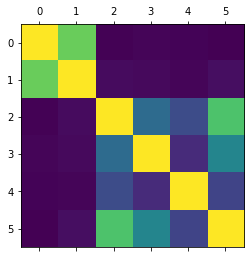

In [15]:
import matplotlib.pyplot as plt

plt.matshow(all_data.corr())
plt.show()


In [16]:
all_data.drop(all_data.columns[all_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [17]:
all_data= all_data.drop(columns=['id'])

In [18]:
import pandas as pd
import numpy as np

corr = all_data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,budget,popularity,runtime,revenue
budget,1.000000,0.339172,0.220219,0.716402
popularity,0.339172,1.000000,0.107961,0.447316
runtime,0.220219,0.107961,1.000000,0.191385
revenue,0.716402,0.447316,0.191385,1.000000


In [19]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,budget,popularity,runtime,revenue
budget,nan,nan,nan,nan
popularity,0.34,nan,nan,nan
runtime,0.22,0.11,nan,nan
revenue,0.72,0.45,0.19,nan
